In [1]:
from numpy import mgrid, sqrt, linspace, meshgrid, zeros

In [2]:
from matplotlib.pyplot import streamplot, cm, figure, style

In [21]:
def pendulo_simple(x, t):
    from numpy import sin, pi
    q, q̇ = x
    m, l, J, g, b = 0.3, 0.4, 0.06, 9.81, 0.2
    kp, kd = 10, 2
    τ = 0 # max(min(-kp*(q) - kd*(q̇), 1), -1)
    #return [q̇, (τ - m*g*l*sin(q) - b*q̇)/(m*l**2 + J)]
    return [q̇, (τ - m*g*l*sin(q))/(m*l**2 + J)]

In [22]:
x = linspace(-10.0, 10.0, 100)
y = linspace(-10.0, 10.0, 100)

X,Y = meshgrid(x, y)

t=0

U, V = zeros(X.shape), zeros(Y.shape)
NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        ẋ = pendulo_simple([x, y], t)
        U[i,j] = ẋ[0]
        V[i,j] = ẋ[1]
        
energia = sqrt(U*U + V*V)
energia_norm = 4*energia/energia.max()

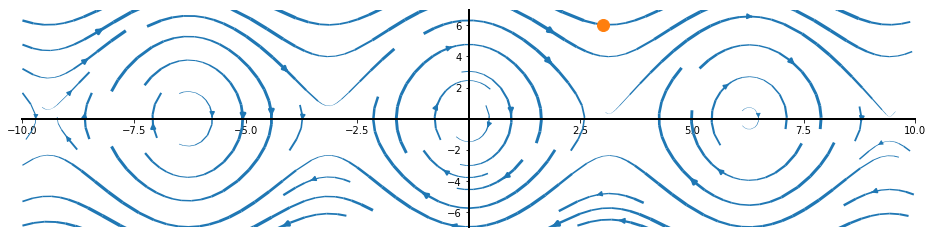

In [25]:
fig = figure(figsize=(16, 4))
ax = fig.gca()
ax.streamplot(X, Y, U, V, density=0.9, linewidth=energia_norm)
ax.plot([3], [6], "o", markersize=12)
ax.set_xlim(-10, 10)
ax.set_ylim(-7, 7)
ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top=False, right=False)

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
        
xticks = ax.xaxis.get_major_ticks()
xticks[4].label1.set_visible(False)
yticks = ax.yaxis.get_major_ticks()
yticks[4].label1.set_visible(False)